In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("../data/bangkok_traffy.csv")

In [3]:
df = df.drop(['organization','comment','photo','photo_after','coords','address','star','count_reopen'],axis=1)

In [4]:
df = df[df['province'].str.contains('กรุงเทพ|bangkok',na=False,case=False)]

In [5]:
df = df.dropna(subset=['subdistrict', 'district'] )

In [6]:
df = df[df['state'].str.contains('เสร็จ',na=False,case=False)]

In [7]:
df.type.unique()

array(['{น้ำท่วม,ร้องเรียน}', '{สะพาน}', '{น้ำท่วม,ถนน}', ...,
       '{ความสะอาด,เสียงรบกวน,ร้องเรียน,ถนน}',
       '{ความสะอาด,สะพาน,สัตว์จรจัด}',
       '{ความสะอาด,สอบถาม,ร้องเรียน,สัตว์จรจัด}'], dtype=object)

In [8]:
df[['subdistrict','district']]

,subdistrict,district
4,หนองบอน,ประเวศ
10,ยานนาวา,สาทร
25,ลาดพร้าว,ลาดพร้าว
64,ลาดพร้าว,ลาดพร้าว
102,ดุสิต,ดุสิต
...,...,...
273790,พระโขนง,คลองเตย
273825,หนองค้างพลู,หนองแขม
273988,ยานนาวา,สาทร
274000,บางคอแหลม,บางคอแหลม


In [9]:
df['timestamp'] = pd.to_datetime(df['timestamp'], utc=True)
df['last_activity'] = pd.to_datetime(df['last_activity'], utc=True)

In [10]:
# Extract the month of the year
df['month'] = df['timestamp'].dt.month

# Extract the year
df['year'] = df['timestamp'].dt.year

# Extract the quarter of the year
df['quarter'] = df['timestamp'].dt.quarter

# # Extract the day of the month
# df['day'] = df['timestamp'].dt.day

In [11]:
df.head()

,ticket_id,type,subdistrict,district,province,timestamp,state,last_activity,month,year,quarter
4,2021-CGPMUN,"{น้ำท่วม,ร้องเรียน}",หนองบอน,ประเวศ,กรุงเทพมหานคร,2021-09-19 14:56:08.924992+00:00,เสร็จสิ้น,2022-06-21 08:21:09.532782+00:00,9,2021,3
10,2021-7XATFA,{สะพาน},ยานนาวา,สาทร,กรุงเทพมหานคร,2021-09-26 05:03:52.594898+00:00,เสร็จสิ้น,2022-06-06 01:17:12.272904+00:00,9,2021,3
25,2021-DVEWYM,"{น้ำท่วม,ถนน}",ลาดพร้าว,ลาดพร้าว,กรุงเทพมหานคร,2021-12-09 12:29:08.408763+00:00,เสร็จสิ้น,2022-08-12 07:18:44.884945+00:00,12,2021,4
64,2021-4D9Y98,{},ลาดพร้าว,ลาดพร้าว,กรุงเทพมหานคร,2021-12-13 05:53:36.861064+00:00,เสร็จสิ้น,2023-03-14 12:09:14.947437+00:00,12,2021,4
102,2021-7U9RED,{},ดุสิต,ดุสิต,กรุงเทพมหานคร,2021-12-17 08:46:02.610983+00:00,เสร็จสิ้น,2023-05-17 06:11:32.463984+00:00,12,2021,4


In [12]:
df['time'] =  (df['last_activity'] - df['timestamp']).dt.days

In [13]:
type_con = df['type'].str.strip('{}').str.get_dummies(',')

In [14]:
df = pd.concat([df,type_con],axis=1)

In [15]:
district_hot =  pd.get_dummies(df['district'])
df = pd.concat([df,district_hot],axis=1)

In [16]:
subdistrict_oh =  pd.get_dummies(df['subdistrict'])
df = pd.concat([df,subdistrict_oh],axis=1)

In [17]:
df = df.drop(['ticket_id','type','subdistrict','district','province','timestamp','state','last_activity'],axis=1)

In [18]:
df[['time']].describe()

,time
count,204099.000000
mean,43.288644
std,70.048936
min,0.000000
25%,1.000000
50%,8.000000
75%,52.000000
max,515.000000


In [19]:
import seaborn as sns
# sns.kdeplot(data=df, x="time")

In [20]:
# Q1 = df['time'].quantile(0.25)
# Q3 = df['time'].quantile(0.75)
# IQR = Q3 - Q1
# df = df.query('(@Q1 - 1.5 * @IQR) <= time <= (@Q3 + 1.5 * @IQR)')

In [21]:
# sns.kdeplot(data=df, x="time")
df[['time']].describe()

,time
count,204099.000000
mean,43.288644
std,70.048936
min,0.000000
25%,1.000000
50%,8.000000
75%,52.000000
max,515.000000


In [22]:
selected_cols = ['time']
df = pd.concat([df[selected_cols], df.drop(columns=selected_cols)], axis=1)

In [23]:
df.head()

,time,month,year,quarter,PM2.5,การเดินทาง,กีดขวาง,คนจรจัด,คลอง,ความปลอดภัย,...,หิรัญรูจี,ห้วยขวาง,อนุสาวรีย์,อรุณอมรินทร์,ออเงิน,เสนานิคม,เสาชิงช้า,แสนแสบ,แสมดำ,โคกแฝด
4,274,9,2021,3,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
10,252,9,2021,3,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
25,245,12,2021,4,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
64,456,12,2021,4,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
102,515,12,2021,4,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False


In [24]:
from sklearn.model_selection import train_test_split

df_train, df_rem = train_test_split(df, test_size=0.3, random_state=123)

df_val, df_test = train_test_split(df_rem, test_size=0.5, random_state=123)


In [25]:
Q1 = df_train['time'].quantile(0.25)
Q3 = df_train['time'].quantile(0.75)
IQR = Q3 - Q1
df_train = df_train.query('(@Q1 - 1.5 * @IQR) <= time <= (@Q3 + 1.5 * @IQR)')

In [26]:
# len(df)*0.7

In [27]:
# len(df_train)

In [28]:
df_train[['time']].describe()

,time
count,124535.000000
mean,19.339856
std,29.202669
min,0.000000
25%,1.000000
50%,5.000000
75%,24.000000
max,128.000000


# Model

In [29]:
import torch
from torch.utils.data import Dataset, DataLoader
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from tqdm import tqdm

class TabularDataset(Dataset):
    def __init__(self, dataframe, feature_scaler, target_scaler):
        self.data = dataframe.to_numpy()
        self.feature_scaler = feature_scaler
        self.target_scaler = target_scaler
        self.targets = self.target_scaler.transform(self.data[:, 0].reshape(-1, 1))
        self.features = self.feature_scaler.transform(self.data[:, 1:])

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        x = torch.tensor(self.features[idx], dtype=torch.float32)
        y = torch.tensor(self.targets[idx], dtype=torch.float32)
        return x, y

In [30]:
feature_scaler = MinMaxScaler()
feature_scaler.fit(df_train.iloc[:, 1:])

target_scaler = MinMaxScaler()
target_scaler.fit(df_train.iloc[:, 0].values.reshape(-1, 1))

MinMaxScaler()

In [31]:
train_dataset = TabularDataset(df_train, feature_scaler, target_scaler)
val_dataset = TabularDataset(df_val, feature_scaler, target_scaler)
test_dataset = TabularDataset(df_test, feature_scaler, target_scaler)


train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=256, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=256, shuffle=False)

c:\Anaconda\envs\torch2\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Anaconda\envs\torch2\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Anaconda\envs\torch2\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [32]:
import torch.nn as nn
import torch.nn.functional as F

class TabularModel(torch.nn.Module):
    def __init__(self, input_size):
        super().__init__()
        # self.fc1 = torch.nn.Linear(input_size, 256)
        # self.fc2 = torch.nn.Linear(256, 128)
        # self.fc3 = torch.nn.Linear(128, 1)
        # self.dropout = nn.Dropout(0.3)
        self.fc1 = torch.nn.Linear(input_size, 128)
        self.fc2 = torch.nn.Linear(128, 32)
        self.fc3 = torch.nn.Linear(32, 1)
        self.dropout = nn.Dropout(0.2)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.fc3(x)
        return x

In [33]:
train_dataset[0]

(tensor([0.7273, 0.0000, 0.6667, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0

In [34]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [35]:
model = TabularModel(input_size=df_train.shape[1]-1).to(device)
# torch.compile(model)
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=5e-3)
# optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
# optimizer = torch.optim.AdamW(model.parameters(), lr=1e-3)

In [36]:
import matplotlib.pyplot as plt

EPOCHS = 5
train_losses = []
test_losses = []

for epoch in range(EPOCHS):
    train_loss = 0.0
    for (inputs, targets) in tqdm(train_loader):
        inputs, targets = inputs.to(device), targets.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    train_loss /= len(train_loader)
    train_losses.append(train_loss)

    test_loss = 0.0
    for (inputs, targets) in tqdm(val_loader):
        inputs, targets = inputs.to(device), targets.to(device)
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        test_loss += loss.item()
    test_loss /= len(test_loader)
    test_losses.append(test_loss)
    
    print(f'Epoch {epoch+1}, Train Loss: {train_loss:.6f}, Test Loss: {test_loss:.6f}')

100%|██████████| 120/120 [00:01<00:00, 104.80it/s]


Epoch 1, Train Loss: 0.046502, Test Loss: 0.278156


100%|██████████| 120/120 [00:00<00:00, 124.15it/s]


Epoch 2, Train Loss: 0.044656, Test Loss: 0.280789


100%|██████████| 120/120 [00:00<00:00, 122.77it/s]


Epoch 3, Train Loss: 0.043898, Test Loss: 0.290968


100%|██████████| 120/120 [00:00<00:00, 124.66it/s]


Epoch 4, Train Loss: 0.043490, Test Loss: 0.291059


100%|██████████| 120/120 [00:00<00:00, 128.51it/s]

Epoch 5, Train Loss: 0.043074, Test Loss: 0.292808


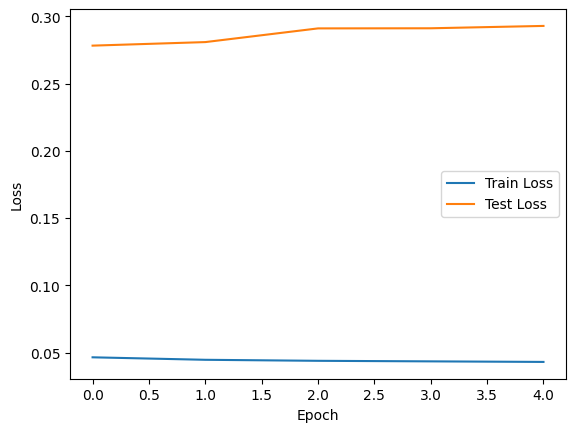

In [37]:
# Plotting the loss
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [38]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

import pandas as pd

def evaluate_model(model, dataloader, feature_scaler, target_scaler):
    criterion = torch.nn.MSELoss()
    model.eval()
    total_loss = 0.0
    y_true = []
    y_pred = []
    with torch.no_grad():
        for inputs, targets in tqdm(dataloader):
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            total_loss += loss.item()
            y_true.extend(targets.cpu().numpy())
            y_pred.extend(outputs.cpu().numpy())
    
    # Inverse transform the scaled values
    y_true = target_scaler.inverse_transform(y_true)
    y_pred = target_scaler.inverse_transform(y_pred)
    
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = mean_squared_error(y_true, y_pred, squared=False)
    
    df = pd.DataFrame({'Actual': y_true.flatten(), 'Predicted': y_pred.flatten()})
    
    return mse, mae, rmse, df

In [39]:
train_mse, train_mae, train_rmse, results_df = evaluate_model(model, train_loader, feature_scaler, target_scaler)
print(f'Train MSE: {train_mse:.4f}')
print(f'Train MAE: {train_mae:.4f}')
print(f'Train RMSE: {train_rmse:.4f}')

results_df.head()

100%|██████████| 1946/1946 [00:06<00:00, 285.76it/s]


Train MSE: 671.8971
Train MAE: 18.1433
Train RMSE: 25.9210


,Actual,Predicted
0,3.0,5.159403
1,1.0,3.928013
2,0.0,5.523972
3,1.0,12.359020
4,5.0,8.632566


In [40]:
# Usage:
test_mse, test_mae, test_rmse, results_df = evaluate_model(model, test_loader, feature_scaler, target_scaler)
print(f'Test MSE: {test_mse:.4f}')
print(f'Test MAE: {test_mae:.4f}')
print(f'Test RMSE: {test_rmse:.4f}')

results_df.head()  # Print the first few rows of the results DataFrame

100%|██████████| 120/120 [00:01<00:00, 118.03it/s]

Test MSE: 4742.4611
Test MAE: 38.2966
Test RMSE: 68.8655


,Actual,Predicted
0,30.0,22.465017
1,0.0,7.876758
2,2.0,13.883105
3,194.0,62.724800
4,48.0,20.213305


In [41]:
results_df.describe()

,Actual,Predicted
count,30615.000000,30615.000000
mean,43.250139,20.303024
std,69.871510,13.289485
min,0.000000,-3.480436
25%,1.000000,10.164715
50%,8.000000,19.722927
75%,53.000000,25.084196
max,352.000000,123.690971
